In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

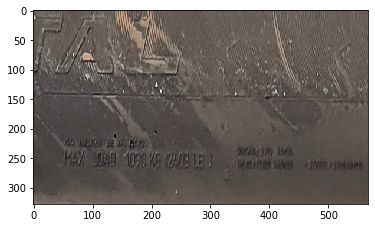

In [16]:
image = cv2.imread("./in/tire_interpolation-5.png")
# image = cv2.imread("./in/hole_tire.jpg")

plt.imshow(image)
plt.show()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

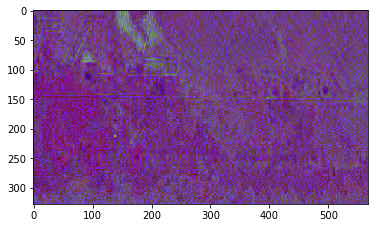

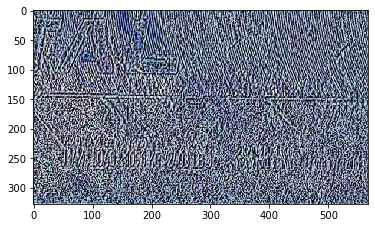

In [26]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

H_c = clahe.apply(H)
S_c = clahe.apply(S)

# V_b = cv2.GaussianBlur(V, (3,3), 0)
V_c = clahe.apply(V)

# combine the channels back into hsv format
hsv = cv2.merge((H_c, S_c, V_c))

plt.imshow(hsv)
plt.show()

plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
plt.show()

